# Centralidade & Disruptividade
---
O intuito deste jupyter notebook é a organização do código em Python para demonstrações e vizualizações.
A verificação é observada apartir das funções criadas que estão sendo importadas do graphutils - somente isso no momento.
Para mais informações contatem os membros do GitHub.

As bibliotecas usadas são:
> Networkx
> 
> Pandas
> 
> Numpy

In [1]:
from graphutils import *
from plotutils import *
from simulation import *

### Criando o grafo
Para criar o grafo, é útilizado a data da rede de pessoas - neste caso os artistas - e utiliza da função get_grafo(), a qual recebe a data_desejada - data de conexões - para criar a rede desejada. No caso a seguir é o grafo pertecente as conexões entre artistas musicais (que será referênciado como somente artistas). 

*OBS*: Como não foi passado seleções de nos especificos, é criado toda a rede social. Caso fosse passado uma lista de nos, o código procuraria somente por ela.

In [2]:
data_desejada = get_data_gz('artists.json')

In [3]:
grafo = get_grafo(data_desejada)

In [4]:
#grafo.edges() para verificar as conexões

### Criando o DataFrame
O data frame é criado apartir do resultado de disruptividade - anteriormente calculado - ou nomeclaturas dos indivíduos, tal qual gênero, decada e mais. Eles serão importantes para a observação de padrões na rede social. Para isso usa a função get_df, de assinatura *get_df(nome_arquivo,extensão)*. No caso a seguir, será o de artistas: 

In [5]:
df = get_df('disrupt','csv')

In [6]:
df

,label,ni,nj,nk,disruption,name,confidence
0,mn0003013627,2.0,0.0,75.0,0.025974,Daughter,0.6747
1,mn0000206668,1.0,0.0,304.0,0.003279,Des'ree,0.5910
2,mn0000622805,236.0,56.0,1566.0,0.096878,Stevie Wonder,1.0000
3,mn0000576718,4.0,4.0,1986.0,0.000000,Seal,0.4939
4,mn0000302106,5.0,3.0,612.0,0.003226,Lisa Stansfield,0.6572
...,...,...,...,...,...,...,...
7428,mn0000669855,0.0,1.0,763.0,-0.001309,Heidi Berry,0.5858
7429,mn0000605992,0.0,1.0,201.0,-0.004950,Muggsy Spanier,0.5908
7430,mn0000410010,1.0,0.0,90.0,0.010989,Nicolette,0.5824
7431,mn0000100312,1.0,0.0,249.0,0.004000,Klee,0.5887


## Utilizando das funções para organizar melhores grafos
Para fazer o uso de verificações viáveis nos grafo, é necessário selecionar partições do grafo de maior conexão para o computador percorrer cada parte em tempo viável e gerar vizualizações, principalmente este último. Para selecionar de maneira rápida, utilizamos do poder dos dataframe para afzer consultas e organizar os dados, afim de selecionar os nos interresantes por algum motivo. Em cada caso, há uma tabela de disruptividade e uma de nomeclatura para cada caso, para os artistas, há o get_artistas_df():

In [7]:
disruption_genre = get_artistas_df()

In [8]:
disruption_genre

,name,earliest_decade,genre,ni,nj,nk,disruption,confidence
label,,,,,,,,
mn0000249175,Les Baxter,1940.0,Easy Listening,7.0,4.0,349.0,0.008333,0.7022
mn0000150502,Henry Brant,1950.0,Classical,1.0,1.0,41.0,0.000000,0.5050
mn0000942680,Café Tacuba,1980.0,Latin,4.0,6.0,1201.0,-0.001652,0.6520
mn0000809357,Jan Hammer,1960.0,Jazz,8.0,1.0,2411.0,0.002893,0.9062
mn0000255704,Pegboy,1990.0,Pop/Rock,4.0,1.0,777.0,0.003836,0.7319
...,...,...,...,...,...,...,...,...
mn0000633079,Strawberry Alarm Clock,1960.0,Pop/Rock,4.0,1.0,2256.0,0.001327,0.7321
mn0000359062,KMFDM,1980.0,Pop/Rock,15.0,4.0,978.0,0.011033,0.9627
mn0000769109,Kid Koala,1990.0,Electronic,1.0,1.0,613.0,0.000000,0.5081


Em seguida, utiliza-se a função get_grafo_parametros - com assinatura *get_grafo_parametro(data_desejada, dataframe_desejado, parametro_primeiro, valor_primeiro, parametro_epoca, valor_chao_epoca, valor_teto_epoca)* - para pegar os nos desejados e criar um subgrafo da conexão total com eles.

In [9]:
grafo_genre = get_grafo_parametros(data_desejada,disruption_genre,'genre','Jazz','earliest_decade',1980)

Abaixo. temos a função de vizualização simples, que utiliza de um grafo qualquer para criar a vizualização da forma de assinatura: 
*gera_grafico(grafo,df,numero_disrupcao,cor_principais,cor_secundarios,tamanho_texto,largura,altura)*

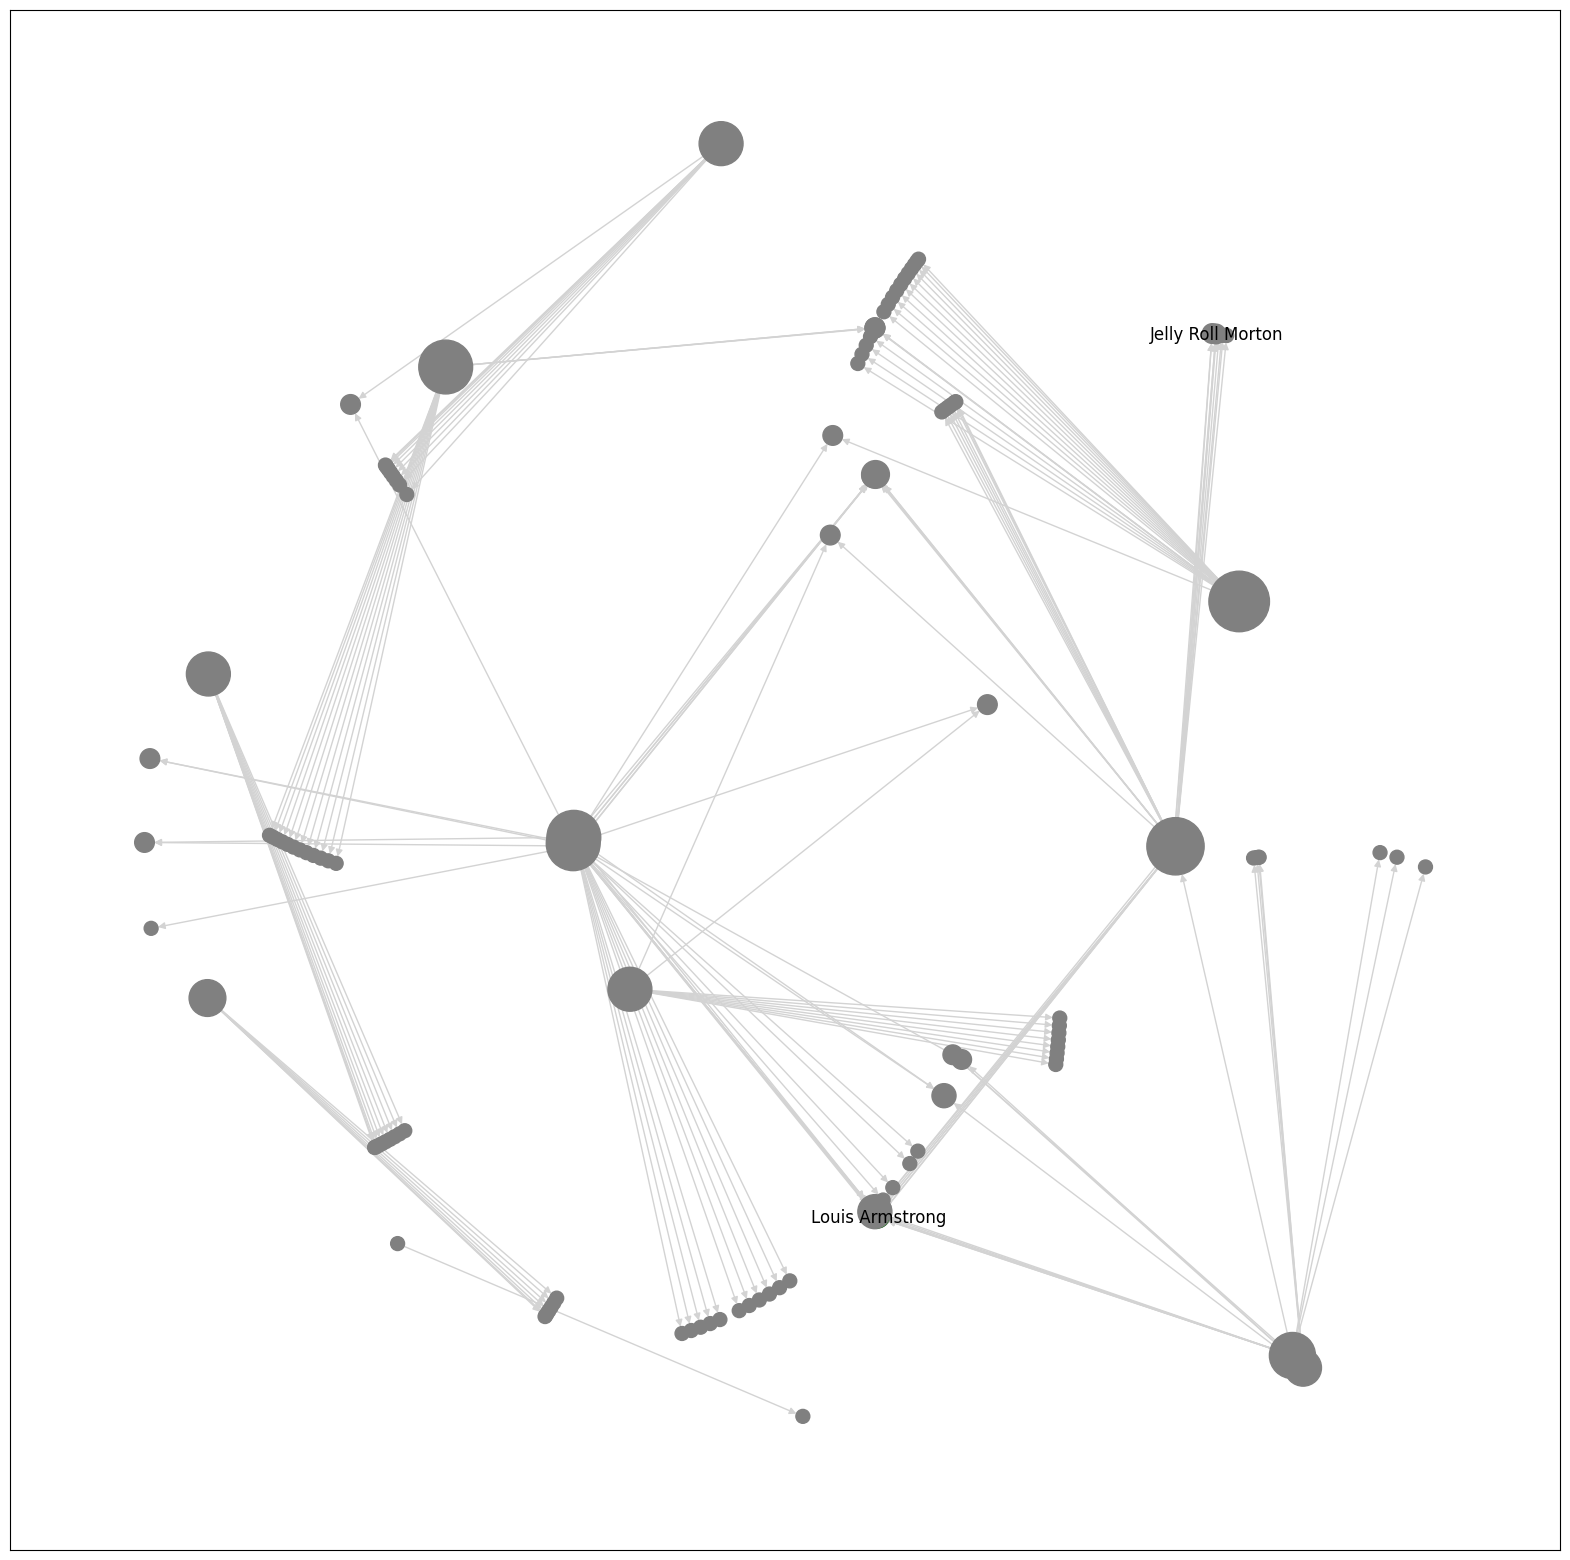

In [10]:
plot_teste = gera_grafico(grafo_genre,disruption_genre,0.2,largura=20,altura=20)
plot_teste

### Resiliência dos Grafos
Para testar a resiliência dos grafos e sua relação com a disrupção e centralidade, vai ser verificado por código utilizando de métodos randomizados para seleção de nós iniciais, finais e o nó intermédiário/central, para analisar as conexões.

In [11]:
generos = list(disruption_genre.groupby('genre').size().index)
total = []
for genero in generos:
    total += grafo_simulation_short_path(disruption_genre,genero,disrupcao=0.2)
len(total)

416

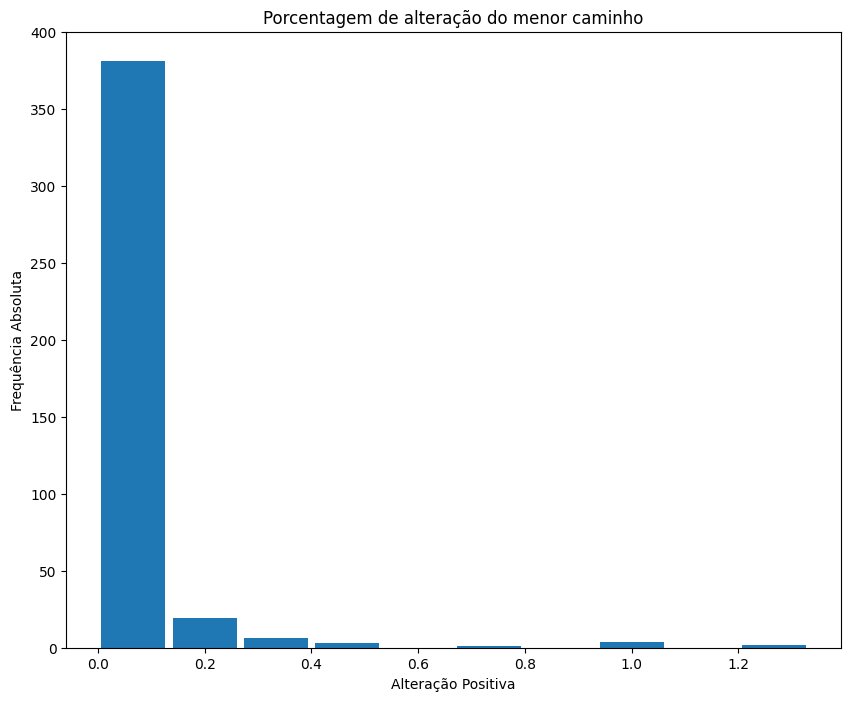

In [12]:
lista_histograma(total)

Neste próximo, será gerado uma sequência de gráficos de histograma para diferentes valores de disrupção positiva, de 0 a 1, somando todos os gêneros, para observar o impacto da disrupção no menor caminho.

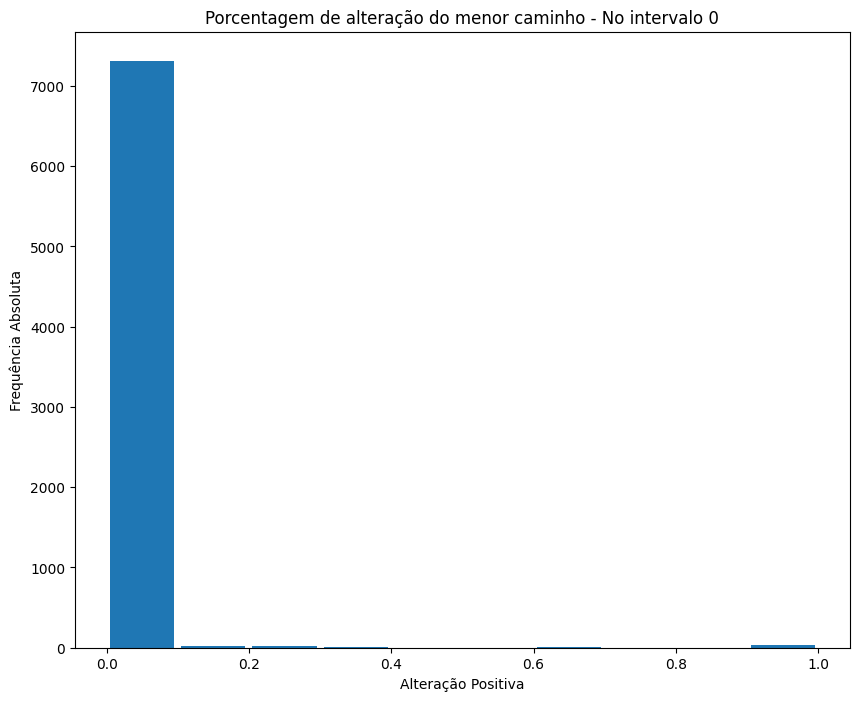

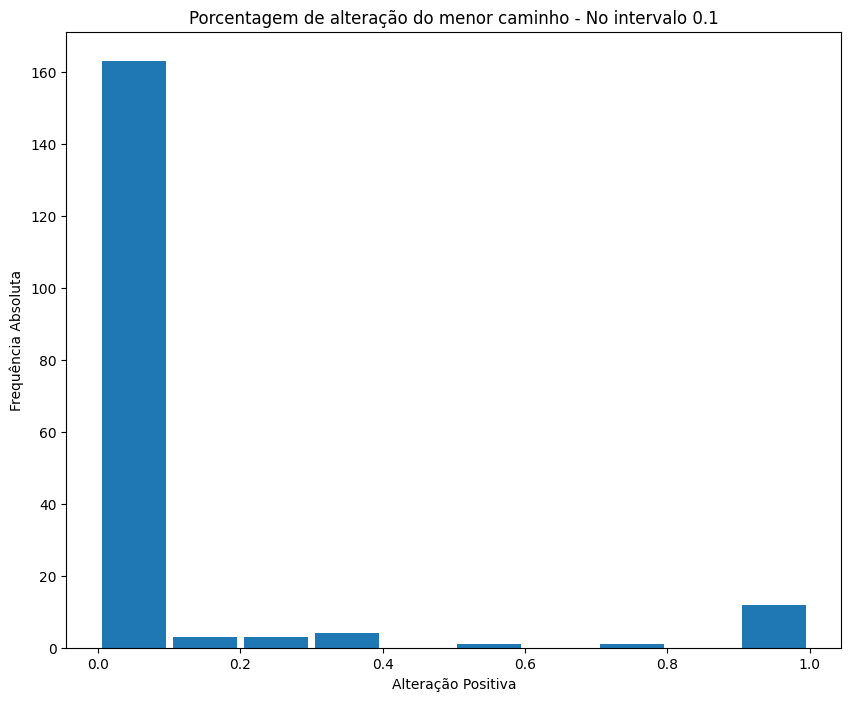

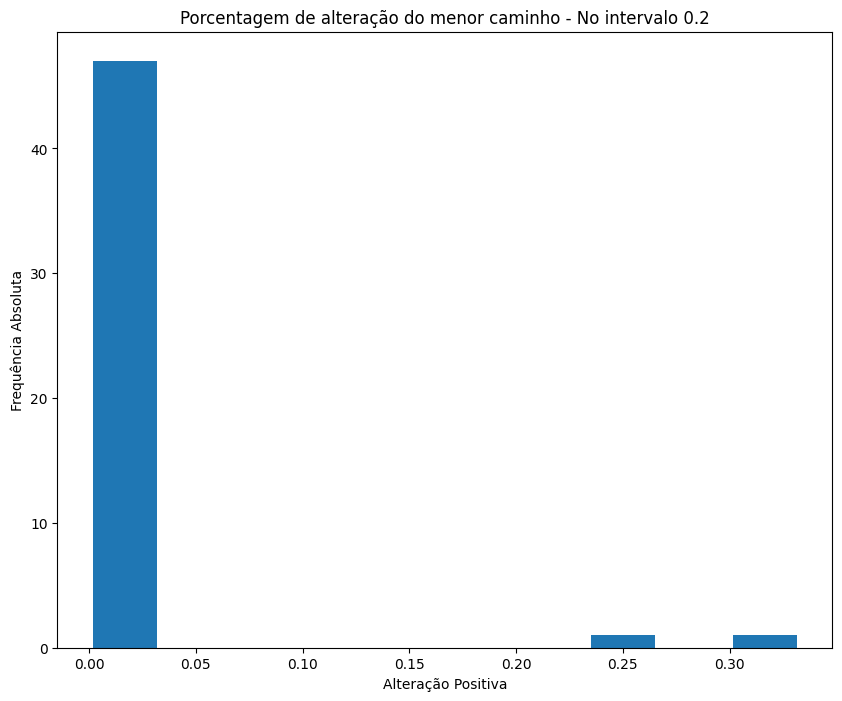

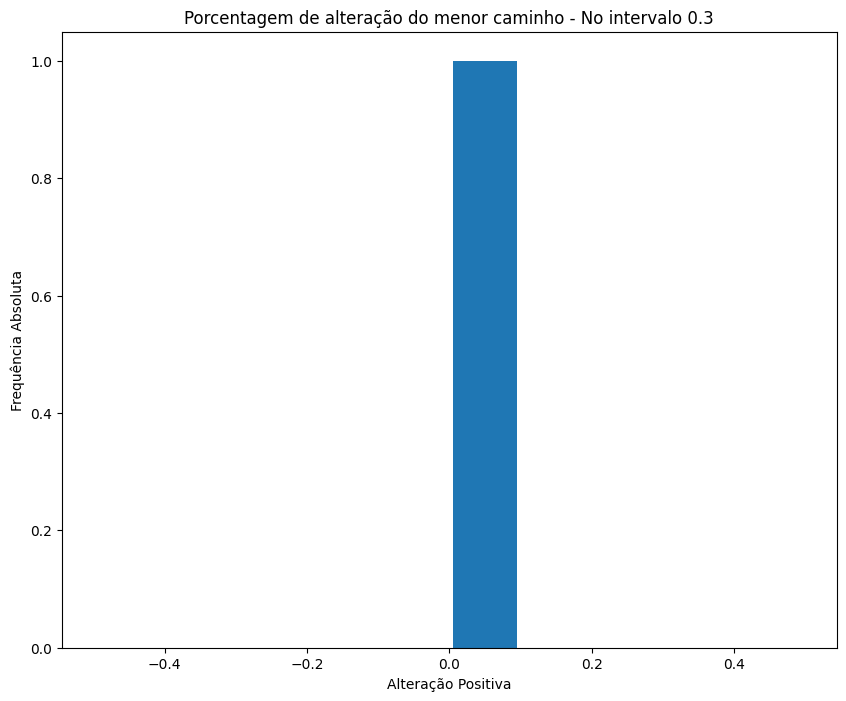

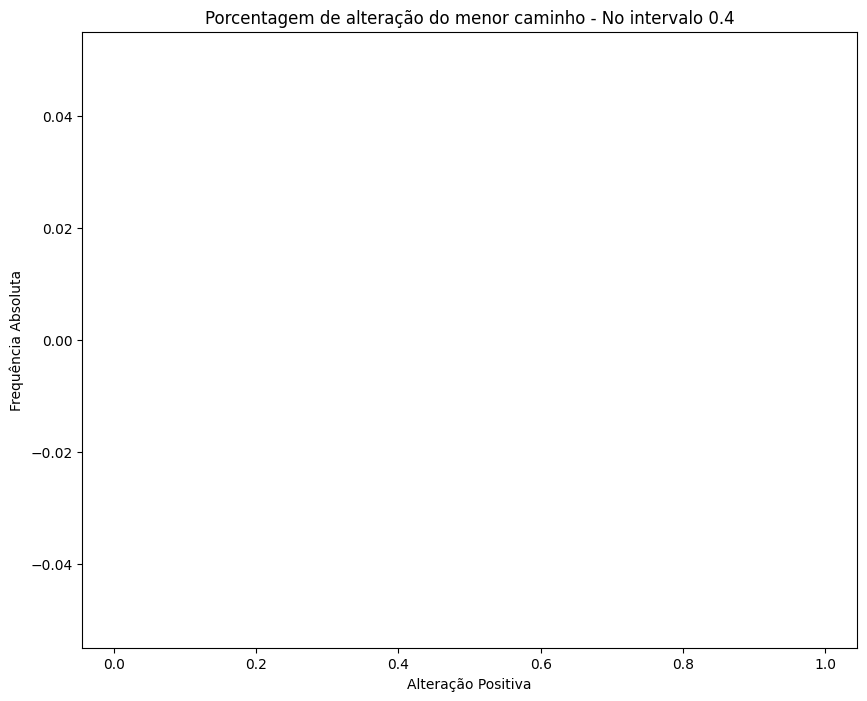

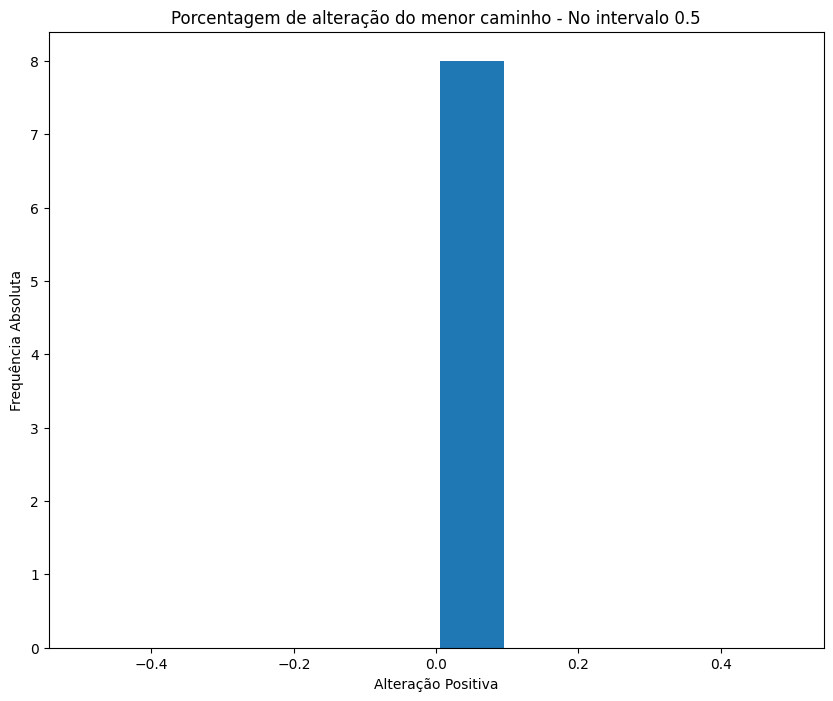

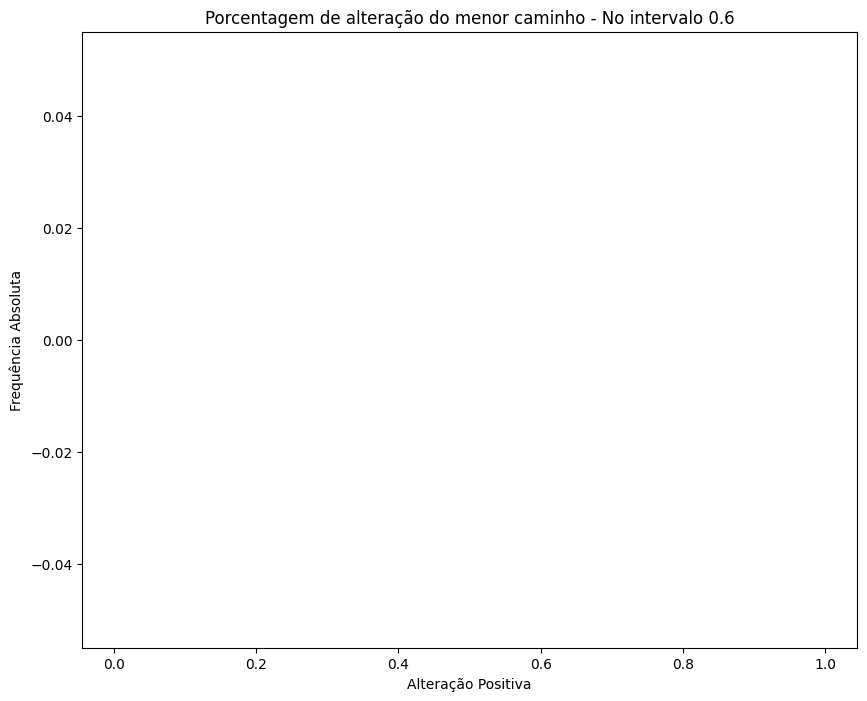

In [ ]:
generos_df = disruption_genre.groupby('genre').size().reset_index()
generos_df = generos_df.rename(columns={0: "Count"})

generos = list(generos_df[generos_df.get('Count') > 100].get('genre'))

intervalo = [0,.1,.2,.3,.4,.5,.6,.7,.8,.9] 
for i in intervalo: 
    total = [] 
    for genero in generos: 
        total += grafo_simulation_short_path(disruption_genre,genero,disrupcao=i,samples=20) 
    lista_histograma(total,title=f'Porcentagem de alteração do menor caminho - No intervalo {i}')